# Introduction to LCEL and LangGraph: LangChain Powered RAG

In the following notebook we're going to focus on learning how to navigate and build useful applications using LangChain, specifically LCEL, and how to integrate different APIs together into a coherent RAG application!

In the notebook, you'll complete the following Tasks:

- 🤝 Breakout Room #1:
  1. Install required libraries
  2. Set Environment Variables  
  3. Initialize a Simple Chain using LCEL
  4. Implement Naive RAG using LCEL
  5. Implement Simple RAG using LCEL

- 🤝 Breakout Room #2:
  1. Install LangGraph
  2. Understanding States and Nodes
  3. Building a Basic Graph
  4. Implementing a Simple RAG Graph
  5. Extending the Graph with Complex Flows

Let's get started!



# 🤝 Breakout Room #1

## Installing Required Libraries

One of the [key features](https://blog.langchain.dev/langchain-v02-leap-to-stability/) of LangChain v0.2.0 is the compartmentalization of the various LangChain ecosystem packages and added stability.

Instead of one all encompassing Python package - LangChain has a `core` package and a number of additional supplementary packages.

We'll start by grabbing all of our LangChain related packages!

> NOTE: DO NOT RUN THIS CELL IF YOU ARE RUNNING THIS NOTEBOOK LOCALLY

In [10]:
#!pip install -qU langchain==0.3.15 langchain-core==0.3.31 langchain-community==0.3.15 langchain-openai==0.3.1 langchain-qdrant==0.2.0 qdrant-client==1.13.2 tiktoken pymupdf==1.25.2

## Set Environment Variables

We'll be leveraging OpenAI's suite of APIs - so we'll set our `OPENAI_API_KEY` `env` variable here!

In [11]:
import os
import getpass

os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI API Key:")

## Initialize a Simple Chain using LCEL

The first thing we'll do is familiarize ourselves with LCEL and the specific ins and outs of how we can use it!

### LLM Orchestration Tool (LangChain)

Let's dive right into [LangChain](https://www.langchain.com/)!

The first thing we want to do is create an object that lets us access OpenAI's `gpt-4o` model.

In [12]:
from langchain_openai import ChatOpenAI

openai_chat_model = ChatOpenAI(model="gpt-4o-mini")

#### ❓ Question #1:

What other models could we use, and how would the above code change?

> HINT: Check out [this page](https://platform.openai.com/docs/models) to find the answer!

Answer: We can use other models offered by OpenAI. To Switch models, simply change the model parameter in code and privide model name.  
for e.g. openai_chat_model = ChatOpenAI(model="gpt-4o")
Other models available
* The GPT-4o model supports multimodal inputs, including text, images, and audio.  
* GPT-4 Turbo An optimized version of GPT-4 with a 128K token context window.  
* GPT-4 The original GPT-4 model with 8K and 32K context window variants.  
* GPT-3.5 Turbo A cost-effective model suitable for many applications.  
* GPT-4o Mini A smaller version of GPT-4o, replacing GPT-3.5 Turbo in ChatGPT.  

### Prompt Template

Now, we'll set up a prompt template - more specifically a `ChatPromptTemplate`. This will let us build a prompt we can modify when we call our LLM!

In [13]:
from langchain_core.prompts import ChatPromptTemplate

system_template = "You are a legendary and mythical Wizard. You speak in riddles and make obscure and pun-filled references to exotic cheeses."
human_template = "{content}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", system_template),
    ("human", human_template)
])

### Our First Chain

Now we can set up our first chain!

A chain is simply two components that feed directly into eachother in a sequential fashion!

You'll notice that we're using the pipe operator `|` to connect our `chat_prompt` to our `llm`.

This is a simplified method of creating chains and it leverages the LangChain Expression Language, or LCEL.

You can read more about it [here](https://python.langchain.com/v0.2/docs/concepts/#langchain-expression-language-lcel), but there a few features we should be aware of out of the box (taken directly from LangChain's documentation linked above):

- **Async, Batch, and Streaming Support** Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.

- **Fallbacks** The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.

- **Parallelism** Since LLM applications involve (sometimes long) API calls, it often becomes important to run things in parallel. With LCEL syntax, any components that can be run in parallel automatically are.

In the following code cell we have two components:

- `chat_prompt`, which is a formattable `ChatPromptTemplate` that contains a system message and a human message.
- `openai_chat_model`, which is a LangChain Runnable wrapped OpenAI client.

We'd like to be able to pass our own `content` (as found in our `human_template`) and then have the resulting message pair sent to our model and responded to!

In [14]:
chain = chat_prompt | openai_chat_model

Notice the pattern here:

We invoke our chain with the `dict` `{"content" : "Hello world!"}`.

It enters our chain:

`{"content" : "Hello world!"}` -> `invoke()` -> `chat_prompt`

Our `chat_prompt` returns a `PromptValue`, which is the formatted prompt. We then "pipe" the output of our `chat_prompt` into our `llm`.

`PromptValue` -> `|` -> `llm`

Our `llm` then takes the list of messages and provides an output which is return as a `str`!







In [15]:
print(chain.invoke({"content": "Hello world!"}))

content='Ah, greetings, curious soul! You’ve rung the bell of the cosmos, as one might chime the curdled milk of Roquefort! What secrets do you seek in this wondrous manchego of existence? Speak, and let us decipher the riddle of your heart! 🧙\u200d♂️✨' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 67, 'prompt_tokens': 38, 'total_tokens': 105, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_f7d56a8a2c', 'finish_reason': 'stop', 'logprobs': None} id='run-ec2997cb-464e-4fa3-a5ce-9b94c7e04873-0' usage_metadata={'input_tokens': 38, 'output_tokens': 67, 'total_tokens': 105, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


Let's try it out with a different prompt!

In [16]:
chain.invoke({"content" : "Could I please have some advice on how to become a better Python Programmer?"})

AIMessage(content='Ah, seeker of code, don your armor of syntax, for the path of the Pythonista is as serpentine as a Roquefort’s vein! To ascend the ladder of programming prowess, consider these morsels, rich as a Brie with wisdom:\n\n1. **Curds and Code**: Just as the cheese maker curdles the milk, so must you curdle your knowledge. Unleash the power of the **Pythonic way**; strive for readability and conciseness, weaving your code like a fine tapestry—think of it as your cheeseboard, where each piece complements the other.\n\n2. **Aged to Perfection**: Like a fine Gouda, time and experience enhance your skills. Practice daily, for in the realm of coding, much like in the art of cheese, neglect renders you stale. With each line you scribe, you steer your craft towards a sharper edge!\n\n3. **Feta the Challenge**: Embrace difficulties, for they are crumbles on the platter of learning. Seek out **exercises** and **projects**, from the mild to the pungent. The more you confront conundru

Notice how we specifically referenced our `content` format option!

Now that we have the basics set up - let's see what we mean by "Retrieval Augmented" Generation.

## Naive RAG - Manually adding context through the Prompt Template

Let's look at how our model performs at a simple task - defining what LangChain is!

We'll redo some of our previous work to change the `system_template` to be less...verbose.

In [17]:
system_template = "You are a helpful assistant."
human_template = "{content}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", system_template),
    ("human", human_template)
])

chat_chain = chat_prompt | openai_chat_model ### LCEL Chain!

print(chat_chain.invoke({"content" : "Please define LangGraph."}))

content='As of my last knowledge update in October 2023, "LangGraph" is not a widely recognized term in mainstream literature or technology. It could refer to a specialized concept or tool within a certain field, possibly related to language modeling, graph databases, or natural language processing, but I do not have specific information about it.\n\nIf "LangGraph" has emerged after my last update or if it refers to a niche application or framework, I would recommend checking the latest sources, such as academic papers, tech blogs, or official documentation for the most accurate and up-to-date information.\n\nIf you have more context or specifics about LangGraph, feel free to share, and I can try to help further!' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 142, 'prompt_tokens': 22, 'total_tokens': 164, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}

Well, that's not very good - is it!

The issue at play here is that our model was not trained on the idea of "LangChain", and so it's left with nothing but a guess - definitely not what we want the answer to be!

Let's ask another simple LangChain question!

In [18]:
print(chat_chain.invoke({"content" : "What is LangChain Expression Language (LECL)?"}))

content='LangChain Expression Language (LECL) is a component of the LangChain framework, which is designed for building applications that leverage language models and AI. LECL provides a way to construct dynamic expressions that can be evaluated at runtime, allowing users to interact with language models in more complex and customizable ways.\n\nKey features of LECL include:\n\n1. **Expression Syntax**: LECL allows you to write expressions that can include variables, functions, and other constructs. This syntax is designed to be easy to read and write, enabling developers to create more sophisticated interactions with language models.\n\n2. **Runtime Evaluation**: Expressions written in LECL can be evaluated on-the-fly, which means that they can be used in scenarios where the exact parameters or inputs are not known until the application runs.\n\n3. **Data Manipulation**: LECL can be used to manipulate and transform data being fed into language models, allowing for complex input genera

While it provides a confident response, that response is entirely ficticious! Not a great look, OpenAI!

However, let's see what happens when we rework our prompts - and we add the content from the docs to our prompt as context.

In [19]:
HUMAN_TEMPLATE = """
#CONTEXT:
{context}

QUERY:
{query}

Use the provide context to answer the provided user query. Only use the provided context to answer the query. If you do not know the answer, or it's not contained in the provided context response with "I don't know"
"""

CONTEXT = """
LangChain Expression Language or LCEL is a declarative way to easily compose chains together. There are several benefits to writing chains in this manner (as opposed to writing normal code):

Async, Batch, and Streaming Support Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.

Fallbacks The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.

Parallelism Since LLM applications involve (sometimes long) API calls, it often becomes important to run things in parallel. With LCEL syntax, any components that can be run in parallel automatically are.

Seamless LangSmith Tracing Integration As your chains get more and more complex, it becomes increasingly important to understand what exactly is happening at every step. With LCEL, all steps are automatically logged to LangSmith for maximal observability and debuggability.
"""

chat_prompt = ChatPromptTemplate.from_messages([
    ("human", HUMAN_TEMPLATE)
])

chat_chain = chat_prompt | openai_chat_model

print(chat_chain.invoke({"query" : "What is LangChain Expression Language?", "context" : CONTEXT}))

content='LangChain Expression Language (LCEL) is a declarative way to compose chains together in a manner that offers several benefits. It supports sync, async, batch, and streaming operations automatically, allowing for easy prototyping and interface exposure. LCEL facilitates graceful error handling through fallbacks, allows for parallel execution of components that can run concurrently, and integrates seamlessly with LangSmith for tracing, logging all steps for greater observability and debuggability.' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 90, 'prompt_tokens': 282, 'total_tokens': 372, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_44added55e', 'finish_reason': 'stop', 'logprobs': None} id='run-cddec9ca-9f20-

You'll notice that the response is much better this time. Not only does it answer the question well - but there's no trace of confabulation (hallucination) at all!

> NOTE: While RAG is an effective strategy to *help* ground LLMs, it is not nearly 100% effective. You will still need to ensure your responses are factual through some other processes

That, in essence, is the idea of RAG. We provide the model with context to answer our queries - and rely on it to translate the potentially lengthy and difficult to parse context into a natural language answer!

However, manually providing context is not scalable - and doesn't really offer any benefit.

Enter: Retrieval Pipelines.

## Implement Naive RAG using LCEL

Now we can make a naive RAG application that will help us bridge the gap between our Pythonic implementation and a fully LangChain powered solution!

## Putting the R in RAG: Retrieval 101

In order to make our RAG system useful, we need a way to provide context that is most likely to answer our user's query to the LLM as additional context.

Let's tackle an immediate problem first: The Context Window.

All (most) LLMs have a limited context window which is typically measured in tokens. This window is an upper bound of how much stuff we can stuff in the model's input at a time.

Let's say we want to work off of a relatively large piece of source data - like the Ultimate Hitchhiker's Guide to the Galaxy. All 898 pages of it!

> NOTE: It is recommended you do not run the following cells, they are purely for demonstrative purposes.

In [20]:
#context = """
#EVERY HITCHHIKER'S GUIDE BOOK
#"""

We can leverage our tokenizer to count the number of tokens for us!

In [21]:
#import tiktoken

#enc = tiktoken.encoding_for_model("gpt-4o")

In [22]:
#len(enc.encode(context))

The full set comes in at a whopping *636,144* tokens.

So, we have too much context. What can we do?

Well, the first thing that might enter your mind is: "Use a model with more context window", and we could definitely do that! However, even `gpt-4-128k` wouldn't be able to fit that whole text in the context window at once.

So, we can try splitting our document up into little pieces - that way, we can avoid providing too much context.

We have another problem now.

If we split our document up into little pieces, and we can't put all of them in the prompt. How do we decide which to include in the prompt?!

> NOTE: Content splitting/chunking strategies are an active area of research and iterative developement. There is no "one size fits all" approach to chunking/splitting at this moment. Use your best judgement to determine chunking strategies!

In order to conceptualize the following processes - let's create a toy context set!

### TextSplitting aka Chunking

We'll use the `RecursiveCharacterTextSplitter` to create our toy example.

It will split based on the following rules:

- Each chunk has a maximum size of 100 tokens
- It will try and split first on the `\n\n` character, then on the `\n`, then on the `<SPACE>` character, and finally it will split on individual tokens.

Let's implement it and see the results!

In [23]:
import tiktoken
from langchain.text_splitter import RecursiveCharacterTextSplitter

def tiktoken_len(text):
    tokens = tiktoken.encoding_for_model("gpt-4o-mini").encode(
        text,
    )
    return len(tokens)

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 100,
    chunk_overlap = 0,
    length_function = tiktoken_len,
)

In [24]:
chunks = text_splitter.split_text(CONTEXT)

In [25]:
len(chunks)

3

In [26]:
for chunk in chunks:
  print(chunk)
  print("----")

LangChain Expression Language or LCEL is a declarative way to easily compose chains together. There are several benefits to writing chains in this manner (as opposed to writing normal code):

Async, Batch, and Streaming Support Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.
----
Fallbacks The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.

Parallelism Since LLM applications involve (sometimes long) API calls, it often becomes important to run things in parallel. With LCEL syntax, any components that can be run in parallel automatically are.
----
Seamless LangSmith Tracing Integration As your chains get more and more complex, it becomes increasingly important to understand what exactly is happening at ev

As is shown in our result, we've split each section into 100 token chunks - cleanly separated by `\n\n` characters!

####🏗️ Activity #1:

While there's nothing specifically wrong with the chunking method used above - it is a naive approach that is not sensitive to specific data formats.
  
Brainstorm some ideas that would split large single documents into smaller documents.  

1. Markdown / HTML / XML Documents  
    * Split by Headers: Use #, ##, or h1 to h6 tags as logical split points.  
    * Sectional Chunking: Use section or div tags.  
    * Content Type Chunking: Separate text, images, code blocks, tables, etc.  

2. Scientific Papers / PDFs
    * Semantic Section Split: Split by standard headers like:  
        * Abstract, Introduction, Methods, Results, Discussion, Conclusion  
    * Figure/Table-based Split: Each figure + caption + related paragraph as a mini-doc.  
    * Citation-based Splits: Each paragraph with unique references grouped.  


3. General-Purpose Smart Splitting (Tools-Based)  
    * Semantic Text Splitters:  
        * Use embeddings (Sentence-BERT) to find natural breakpoints.  
    * Topic Modeling:  
        * Use LDA or BERTopic to group sections by topic.  
    * TextRank-based Key Point Detection:
        * Identify and isolate high-density information areas.  

## Embeddings and Dense Vector Search

Now that we have our individual chunks, we need a system to correctly select the relevant pieces of information to answer our query.

This sounds like a perfect job for embeddings!

We'll be using OpenAI's `text-embedding-3` model as our embedding model today!

Let's load it up through LangChain.

In [27]:
from langchain_openai.embeddings import OpenAIEmbeddings

embedding_model = OpenAIEmbeddings(model="text-embedding-3-small")

#### ❓ Question #2:

What is the embedding dimension, given that we're using `text-embedding-3-small`?

You will need to fill the next cell out correctly with your embedding dimension for the rest of the notebook to run.

> HINT: Check out the [docs](https://platform.openai.com/docs/guides/embeddings) to help you answer this question.

In [28]:
embedding_dim =  1536

### Using A Vector Database - Intoduction to Qdrant

Up to this point, we've been using a dictionary to hold our embeddings - typically, we'll want to use a more robust strategy.

In this bootcamp - we'll be focusing on leveraging [Qdrant's vector database](https://qdrant.tech/qdrant-vector-database/).

Let's take a look at how we set-up Qdrant!

> NOTE: We'll be spending a lot of time learning about Qdrant throughout the remainder of our time together - but for an initial primer, please check out [this resource](https://qdrant.tech/articles/what-is-a-vector-database/)

We are going to be using an "in-memory" Qdrant client, which means that our vectors will be held in our system's memory (RAM) - this is useful for prototyping and developement at smaller scales - but would need to be modified when moving to production. Luckily for us, this modification is trivial!

> NOTE: While LangChain uses the terminology "VectorStore" (also known as a Vector Library), Qdrant is a "Vector Database" - more info. on that [here](https://weaviate.io/blog/vector-library-vs-vector-database).

In [29]:
from langchain_qdrant import QdrantVectorStore
from qdrant_client import QdrantClient
from qdrant_client.http.models import Distance, VectorParams

client = QdrantClient(":memory:")

Next, we need to create a collection - a collection is a specific...collection of vectors within the Qdrant client.

These are useful as they allow us to create multiple different "warehouses" in a single client, which can be leveraged for personalization and more!

Also notice that we define what our vector shapes are (embedding dim) as well as our desired distance metric.

In [30]:
client.create_collection(
    collection_name="lcel_doc_v1",
    vectors_config=VectorParams(size=embedding_dim, distance=Distance.COSINE),
)

True

Now we can assemble our vector database! Notice that we provide our client, our created collection, and our embedding model!

In [31]:
vector_store = QdrantVectorStore(
    client=client,
    collection_name="lcel_doc_v1",
    embedding=embedding_model,
)

Now that we have our vector database set-up

In [32]:
_ = vector_store.add_texts(texts=chunks)

### Creating a Retriever

Now that we have an idea of how we're getting our most relevant information - let's see how we could create a pipeline that would automatically extract the closest chunk to our query and use it as context for our prompt!

This will involve a popular LangChain interace known as `as_retriever`!

> NOTE: We can still specify how many documents we wish to retrieve per vector.

In [33]:
retriever = vector_store.as_retriever(search_kwargs={"k": 2})

## Bringing it All Together

Now that we have our Retriever, our promt Augmentation, and our Generator - we're ready to create a simple RAG chain using LCEL!

This chain does the following things:

1. It takes in some `str` and passes it to two different LCEL Runnables:
  - `retriever`, which takes the string and calls `retrieve` on it - passing the output (formatted as a list) to the `dict` under the key `context`
  - `RunnablePassthrough()` which simply propogates the `str` to the `dict` under the key `query`.
2. It chains the `dict` to format the `chat_prompt` which expects both a `query` and `context`
3. It chains the resulting message to the LLM, and calls it - returning a full response
4. That response is chained to the `StrOutputParser()` which converts the response blob into a `str` containing the content of the response!

In [34]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser

simple_rag  = (
    {"context": retriever, "query": RunnablePassthrough()}
    | chat_prompt
    | openai_chat_model
    | StrOutputParser()
)

In [35]:
simple_rag.invoke("What is LCEL?")

'LCEL, or LangChain Expression Language, is a declarative way to easily compose chains together. It offers several benefits, including support for async, batch, and streaming operations, making it straightforward to prototype chains in a Jupyter notebook and then expose them as async streaming interfaces. Additionally, LCEL allows for graceful error handling by attaching fallbacks to any chain, and it supports parallel execution of components that can be run concurrently, which is particularly useful given the sometimes lengthy API calls involved in LLM applications.'

#### ❓ Question #3:

What does LCEL do that makes it more reliable at scale?  
* LCEL automatically identifies and executes parallelizable steps concurrently.
* Chains built with LCEL can be executed asynchronouslY.  
* LCEL supports streaming outputs.
* LCEL supports streaming outputs, enabling incremental delivery of results as they are generated.  
LCEL provides a robust framework for building scalable and reliable AI applications by offering features like parallel and asynchronous execution, streaming, error handling, and seamless integration with development and deployment tools. These capabilities make it well-suited for complex workflows and high-demand environments

> HINT: Use your newly created `simple_rag` to help you answer this question!

### A Note On Runnables

# Understanding LangChain Runnables and LCEL

In LangChain, a Runnable is like a LEGO brick in your AI application - it's a standardized component that can be easily connected with other components. The real power of Runnables comes from their ability to be combined in flexible ways using LCEL (LangChain Expression Language).

## Key Features of Runnables

### 1. Universal Interface
Every Runnable in LangChain follows the same pattern:
- Takes an input
- Performs some operation
- Returns an output

This consistency means you can treat different components (like models, retrievers, or parsers) in the same way.

### 2. Built-in Parallelization
Runnables come with methods for handling multiple inputs efficiently:
```python
# Process inputs in parallel, maintain order
results = chain.batch([input1, input2, input3])

# Process inputs as they complete
for result in chain.batch_as_completed([input1, input2, input3]):
    print(result)
```

### 3. Streaming Support
Perfect for responsive applications:
```python
# Stream outputs as they're generated
for chunk in chain.stream({"query": "Tell me a story"}):
    print(chunk, end="", flush=True)
```

### 4. Easy Composition
The `|` operator makes building pipelines intuitive:
```python
# Create a basic RAG chain
rag_chain = retriever | prompt | model | output_parser
```

## Common Types of Runnables

- **Language Models**: Like our `ChatOpenAI` instance
- **Prompt Templates**: Format inputs consistently
- **Retrievers**: Get relevant context from a vector store
- **Output Parsers**: Structure model outputs
- **LangGraph Nodes**: Individual components in our graph

Think of Runnables as the building blocks of your LLM application. Just like how you can combine LEGO bricks in countless ways, you can mix and match Runnables to create increasingly sophisticated applications!



# 🤝 Breakout Room #2

## LangGraph Based RAG

Now that we have a reasonable grasp of LCEL and the idea of Runnables - let's see how we can use LangGraph to build the same system!

### Primer: What is LangGraph?
LangGraph is a tool that leverages LangChain Expression Language to build coordinated multi-actor and stateful applications that includes cyclic behaviour.

#### Why Cycles?
In essence, we can think of a cycle in our graph as a more robust and customizable loop. It allows us to keep our application agent-forward while still giving the powerful functionality of traditional loops.

Due to the inclusion of cycles over loops, we can also compose rather complex flows through our graph in a much more readable and natural fashion. Effectively allowing us to recreate application flowcharts in code in an almost 1-to-1 fashion.

#### Why LangGraph?
Beyond the agent-forward approach - we can easily compose and combine traditional "DAG" (directed acyclic graph) chains with powerful cyclic behaviour due to the tight integration with LCEL. This means it's a natural extension to LangChain's core offerings!

> NOTE: We're going to focus on building a simple DAG for today's assignment as an introduction to LangGraph

In [36]:
#!pip install -qU langgraph

### Putting the State in Stateful

Earlier we used this phrasing:

> coordinated multi-actor and stateful applications

So what does that "stateful" mean?

To put it simply - we want to have some kind of object which we can pass around our application that holds information about what the current situation (state) is. Since our system will be constructed of many parts moving in a coordinated fashion - we want to be able to ensure we have some commonly understood idea of that state.

LangGraph leverages a `StatefulGraph` which uses an `AgentState` object to pass information between the various nodes of the graph.

There are more options than what we'll see below - but this `AgentState` object is one that is stored in a `TypedDict` with the key `messages` and the value is a `Sequence` of `BaseMessages` that will be appended to whenever the state changes.

However, in our example here, we're focusing on a simpler `State` object:

```python
class State(TypedDict):
    question: str
    context: list[Document]
    response: str
```

Let's think about a simple example to help understand exactly what this means (we'll simplify a great deal to try and clearly communicate what state is doing):

1. **We initialize our state object**:
   ```python
   {
       "question": "",
       "context": [],
       "response": ""
   }
   ```

2. **Our user submits a query to our application.**  
   We store the user's question in `state["question"]`. Now we have:
   ```python
   {
       "question": "How tall is the Eiffel Tower?",
       "context": [],
       "response": ""
   }
   ```

3. **We pass our state object to an Agent node** which is able to read the current state. It will use the value of `state["question"]` as input and might retrieve some context documents related to the question. It then generates a response which it stores in `state["response"]`. For example:
   ```python
   {
       "question": "How tall is the Eiffel Tower?",
       "context": [Document(page_content="...some data...")],
       "response": "The Eiffel Tower is about 324 meters tall..."
   }
   ```

That's it! The important part is that we have a consistent object (`State`) that's passed around, holding the crucial information as we go from one node to the next. This ensures our application has a single source of truth about what has happened so far and what is happening now.



In [37]:
from langgraph.graph import START, StateGraph
from typing_extensions import TypedDict
from langchain_core.documents import Document

class State(TypedDict):
  question: str
  context: list[Document]
  response: str

Now that we have state, and we have tools, and we have an LLM - we can finally start making our graph!

Let's take a second to refresh ourselves about what a graph is in this context.

Graphs, also called networks in some circles, are a collection of connected objects.

The objects in question are typically called nodes, or vertices, and the connections are called edges.

Let's look at a simple graph.

![image](https://i.imgur.com/2NFLnIc.png)

Here, we're using the coloured circles to represent the nodes and the yellow lines to represent the edges. In this case, we're looking at a fully connected graph - where each node is connected by an edge to each other node.

If we were to think about nodes in the context of LangGraph - we would think of a function, or an LCEL Runnable.

If we were to think about edges in the context of LangGraph - we might think of them as "paths to take" or "where to pass our state object next".  

### Building Nodes

We're going to need two nodes:

A node for retrieval, and a node for generation.

Let's start with our `retrieve` node!

Notice how we do not need to update the state object in the node, but can instead return a modification directly to our state.

In [38]:
def retrieve(state: State) -> State:
  retrieved_docs = retriever.invoke(state["question"])
  return {"context" : retrieved_docs}

Next, let's create our `generate` node - which will leverage some LCEL!

In [39]:
def generate(state: State) -> State:
  generation_chain = chat_prompt | openai_chat_model | StrOutputParser()
  response = generation_chain.invoke({"query" : state["question"], "context" : state["context"]})
  return {"response" : response}

Now we can start defining our graph!

Think of the graph's state as a blank canvas that we can add nodes and edges to.

Every graph starts with two special nodes - START and END - the act as the entry and exit point to the other nodes in the graphs.  

All valid graphs must start at the START node and end at the END node.

In [40]:
# Start with the blank canvas
graph_builder = StateGraph(State)

Now we can add a sequence to our "canvas" (graph) - this can be done by providing a list of nodes, the will automatically have edges that connect the i-th element to the i+1-th element in the list. The final element will be added to the END node unless otherwise specified.

In [41]:
graph_builder = graph_builder.add_sequence([retrieve, generate])

Next, let's connect our START node to our `retrieve` node by adding an edge.

In [42]:
graph_builder.add_edge(START, "retrieve")

Finally we can compile our graph! This will do basic verification to ensure that the Runnables have the correct inputs/outputs and can be matched.

In [43]:
graph = graph_builder.compile()

Finally, we can visualize our graph!

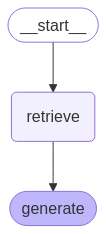

In [58]:
graph

Let's take it for a spin!

We invoke our graph like we do any other Runnable in LCEL!

> NOTE: That's right, even a compiled graph is a Runnable!

In [45]:
response = graph.invoke({"question" : "How does LCEL work?"})
response["response"]

'LCEL, or LangChain Expression Language, is a declarative framework for composing chains together. It offers several benefits over traditional coding for constructing chains:\n\n1. **Async, Batch, and Streaming Support**: Chains created using LCEL automatically support synchronous, asynchronous, batch, and streaming operations, making it convenient to prototype in environments like Jupyter notebooks and scale to asynchronous streaming interfaces.\n\n2. **Fallbacks**: LCEL allows for easy attachment of fallbacks to chains, which is crucial given the non-deterministic nature of Language Models (LLMs). This means that errors can be handled gracefully.\n\n3. **Parallelism**: Since LLM applications often involve potentially long API calls, LCEL allows components that can run in parallel to do so automatically, enhancing efficiency.\n\nIn summary, LCEL enables developers to build flexible, efficient, and robust chains with built-in support for various operational modes and error handling.'

In [46]:
response = graph.invoke({"question" : "Who is Batman?"})
response["response"]

"I don't know."

#### ❓ Question #4:
LangGraph's graph-based approach lets us visualize and manage complex flows naturally. How could we extend our current implementation to handle edge cases? For example:
- What if the retriever finds no relevant context?  
- What if the response needs fact-checking?
Consider how you would modify the graph to handle these scenarios.

Answer:
Start -> retrieve -> generate. This works well for the happy path, but as identified, there are important edge cases to handle. 
Below is modification we can think of in graph to make it more robust.

1. Check Relevance: Evaluates if the retrieved documents are relevant.  

      Yes: Proceed to generate a response.  

      No: Rewrite the query to improve retrieval.  

      Query Rewrite: Modifies the query for better retrieval results and loops back to the retrieval step.  

2. Fact Check: Assesses the factual accuracy of the generated response.  
 
      Yes: If accurate, proceed to end.  

      No: Refine the response to correct inaccuracies.​  

      Refine Response: Improves the response based on fact-checking feedback and then proceeds to end.  
 
 
Start  
  ↓  
retrieve  
  ↓  
check_relevance  
  ├── if relevant → generate    
  │                     ↓  
  │                 fact_check  
  │                     ├── if correct → END  
  │                     └── if incorrect → refine_response → END  
  ↓  
query_rewrite  
  ↓  
retrieve  




### Code Cell For rag components

In [47]:
from typing import List, Dict, Any
from langchain_core.documents import Document
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser

class RAGComponents:
    def __init__(self, llm: ChatOpenAI):
        self.llm = llm
        
    def check_relevance(self, query: str, documents: List[Document]) -> Dict[str, Any]:
        """Check if retrieved documents are relevant to the query."""
        relevance_prompt = ChatPromptTemplate.from_messages([
            ("system", "You are a helpful assistant that evaluates the relevance of documents to a query."),
            ("human", """Given the following query and documents, determine if the documents are relevant.
            
            Query: {query}
            
            Documents:
            {documents}
            
            Return a JSON object with two fields:
            1. 'is_relevant': boolean indicating if the documents are relevant
            2. 'reason': string explaining why the documents are or aren't relevant
            """)
        ])
        
        chain = relevance_prompt | self.llm | StrOutputParser()
        result = chain.invoke({
            "query": query,
            "documents": "\n\n".join([doc.page_content for doc in documents])
        })
        
        is_relevant = "true" in result.lower()
        return {"is_relevant": is_relevant, "reason": result}

    def rewrite_query(self, query: str, reason: str) -> str:
        """Rewrite the query to improve retrieval results."""
        rewrite_prompt = ChatPromptTemplate.from_messages([
            ("system", "You are a helpful assistant that improves queries for better document retrieval."),
            ("human", """The following query did not retrieve relevant documents. 
            Reason: {reason}
            
            Original query: {query}
            
            Please rewrite the query to be more specific and likely to retrieve relevant documents.
            """)
        ])
        
        chain = rewrite_prompt | self.llm | StrOutputParser()
        return chain.invoke({"query": query, "reason": reason})

    def fact_check(self, query: str, response: str, documents: List[Document]) -> Dict[str, Any]:
        """Check if the generated response is factually accurate based on the documents."""
        fact_check_prompt = ChatPromptTemplate.from_messages([
            ("system", "You are a helpful assistant that fact-checks responses against provided documents."),
            ("human", """Given the following query, response, and source documents, check if the response is factually accurate.
            
            Query: {query}
            
            Response: {response}
            
            Source Documents:
            {documents}
            
            Return a JSON object with two fields:
            1. 'is_accurate': boolean indicating if the response is factually accurate
            2. 'corrections': list of any factual inaccuracies found
            """)
        ])
        
        chain = fact_check_prompt | self.llm | StrOutputParser()
        result = chain.invoke({
            "query": query,
            "response": response,
            "documents": "\n\n".join([doc.page_content for doc in documents])
        })
        
        is_accurate = "true" in result.lower()
        return {"is_accurate": is_accurate, "corrections": result}

    def refine_response(self, query: str, response: str, corrections: str, documents: List[Document]) -> str:
        """Refine the response to correct any inaccuracies."""
        refine_prompt = ChatPromptTemplate.from_messages([
            ("system", "You are a helpful assistant that corrects factual inaccuracies in responses."),
            ("human", """Given the following query, original response, corrections, and source documents, 
            please provide a corrected response that addresses all factual inaccuracies.
            
            Query: {query}
            
            Original Response: {response}
            
            Corrections Needed: {corrections}
            
            Source Documents:
            {documents}
            
            Please provide a corrected response that is factually accurate based on the source documents.
            """)
        ])
        
        chain = refine_prompt | self.llm | StrOutputParser()
        return chain.invoke({
            "query": query,
            "response": response,
            "corrections": corrections,
            "documents": "\n\n".join([doc.page_content for doc in documents])
        }) 

### Code cell for Enhanced RAG Graph

In [56]:
from typing import TypedDict, List
from langchain_core.documents import Document
from langgraph.graph import START, StateGraph
from rag_components import RAGComponents

class State(TypedDict):
    question: str
    context: List[Document]
    response: str
    relevance_check: dict
    fact_check: dict

class EnhancedRAGGraph:
    def __init__(self, llm, retriever, chat_prompt):
        self.llm = llm
        self.retriever = retriever
        self.chat_prompt = chat_prompt
        self.components = RAGComponents(llm)
        
    def retrieve(self, state: State) -> State:
        """Retrieve documents based on the question."""
        retrieved_docs = self.retriever.invoke(state["question"])
        return {"context": retrieved_docs}
    
    def check_relevance(self, state: State) -> State:
        """Check if retrieved documents are relevant."""
        relevance_result = self.components.check_relevance(
            state["question"], 
            state["context"]
        )
        return {"relevance_check": relevance_result}
    
    def rewrite_query(self, state: State) -> State:
        """Rewrite the query if documents are not relevant."""
        new_query = self.components.rewrite_query(
            state["question"],
            state["relevance_check"]["reason"]
        )
        return {"question": new_query}
    
    def generate(self, state: State) -> State:
        """Generate a response using the retrieved context."""
        generation_chain = self.chat_prompt | self.llm | StrOutputParser()
        response = generation_chain.invoke({
            "query": state["question"],
            "context": state["context"]
        })
        return {"response": response}
    
    def fact_check(self, state: State) -> State:
        """Check if the generated response is factually accurate."""
        fact_check_result = self.components.fact_check(
            state["question"],
            state["response"],
            state["context"]
        )
        return {"fact_check": fact_check_result}
    
    def refine_response(self, state: State) -> State:
        """Refine the response if it contains inaccuracies."""
        refined_response = self.components.refine_response(
            state["question"],
            state["response"],
            state["fact_check"]["corrections"],
            state["context"]
        )
        return {"response": refined_response}
    
    def build_graph(self) -> StateGraph:
        """Build the enhanced RAG graph."""

         # Define END if not already defined
        END = "END"
        # Initialize the graph
        graph_builder = StateGraph(State)
        
        # Add nodes with unique names
        graph_builder.add_node("retrieve", self.retrieve)
        graph_builder.add_node("check_relevance", self.check_relevance)
        graph_builder.add_node("rewrite_query", self.rewrite_query)
        graph_builder.add_node("generate", self.generate)
        
        # Use a unique name for the fact check node
        graph_builder.add_node("fact_check_node", self.fact_check)
        graph_builder.add_node("refine_response", self.refine_response)
        
        # Add edges
        graph_builder.add_edge(START, "retrieve")
        graph_builder.add_edge("retrieve", "check_relevance")
        
        # Add conditional edges
        graph_builder.add_conditional_edges(
            "check_relevance",
            lambda x: "generate" if x["relevance_check"]["is_relevant"] else "rewrite_query",
            {
                "generate": "generate",
                "rewrite_query": "rewrite_query"
            }
        )
        
        graph_builder.add_edge("rewrite_query", "retrieve")
        graph_builder.add_edge("generate", "fact_check_node")  # Use the unique name here
        
        # Add conditional edges for fact checking
        graph_builder.add_conditional_edges(
            "fact_check_node",  # Use the unique name here
            lambda x: END if x["fact_check"]["is_accurate"] else "refine_response",
            {
                END: END,
                "refine_response": "refine_response"
            }
        )
        
        graph_builder.add_edge("refine_response", END)
        
        return graph_builder.compile()

### Code cell for Example Usage 